In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [44]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
X = np.c_[np.ones(X.shape[0]), X]


In [45]:
def compute_cost(X, y, theta, alpha, lamda):
    m = len(y)
    cost = (1/(2*m)) * np.sum((X.dot(theta) - y)**2) + (lamda/(2*m)) * np.sum(theta**2)
    return cost

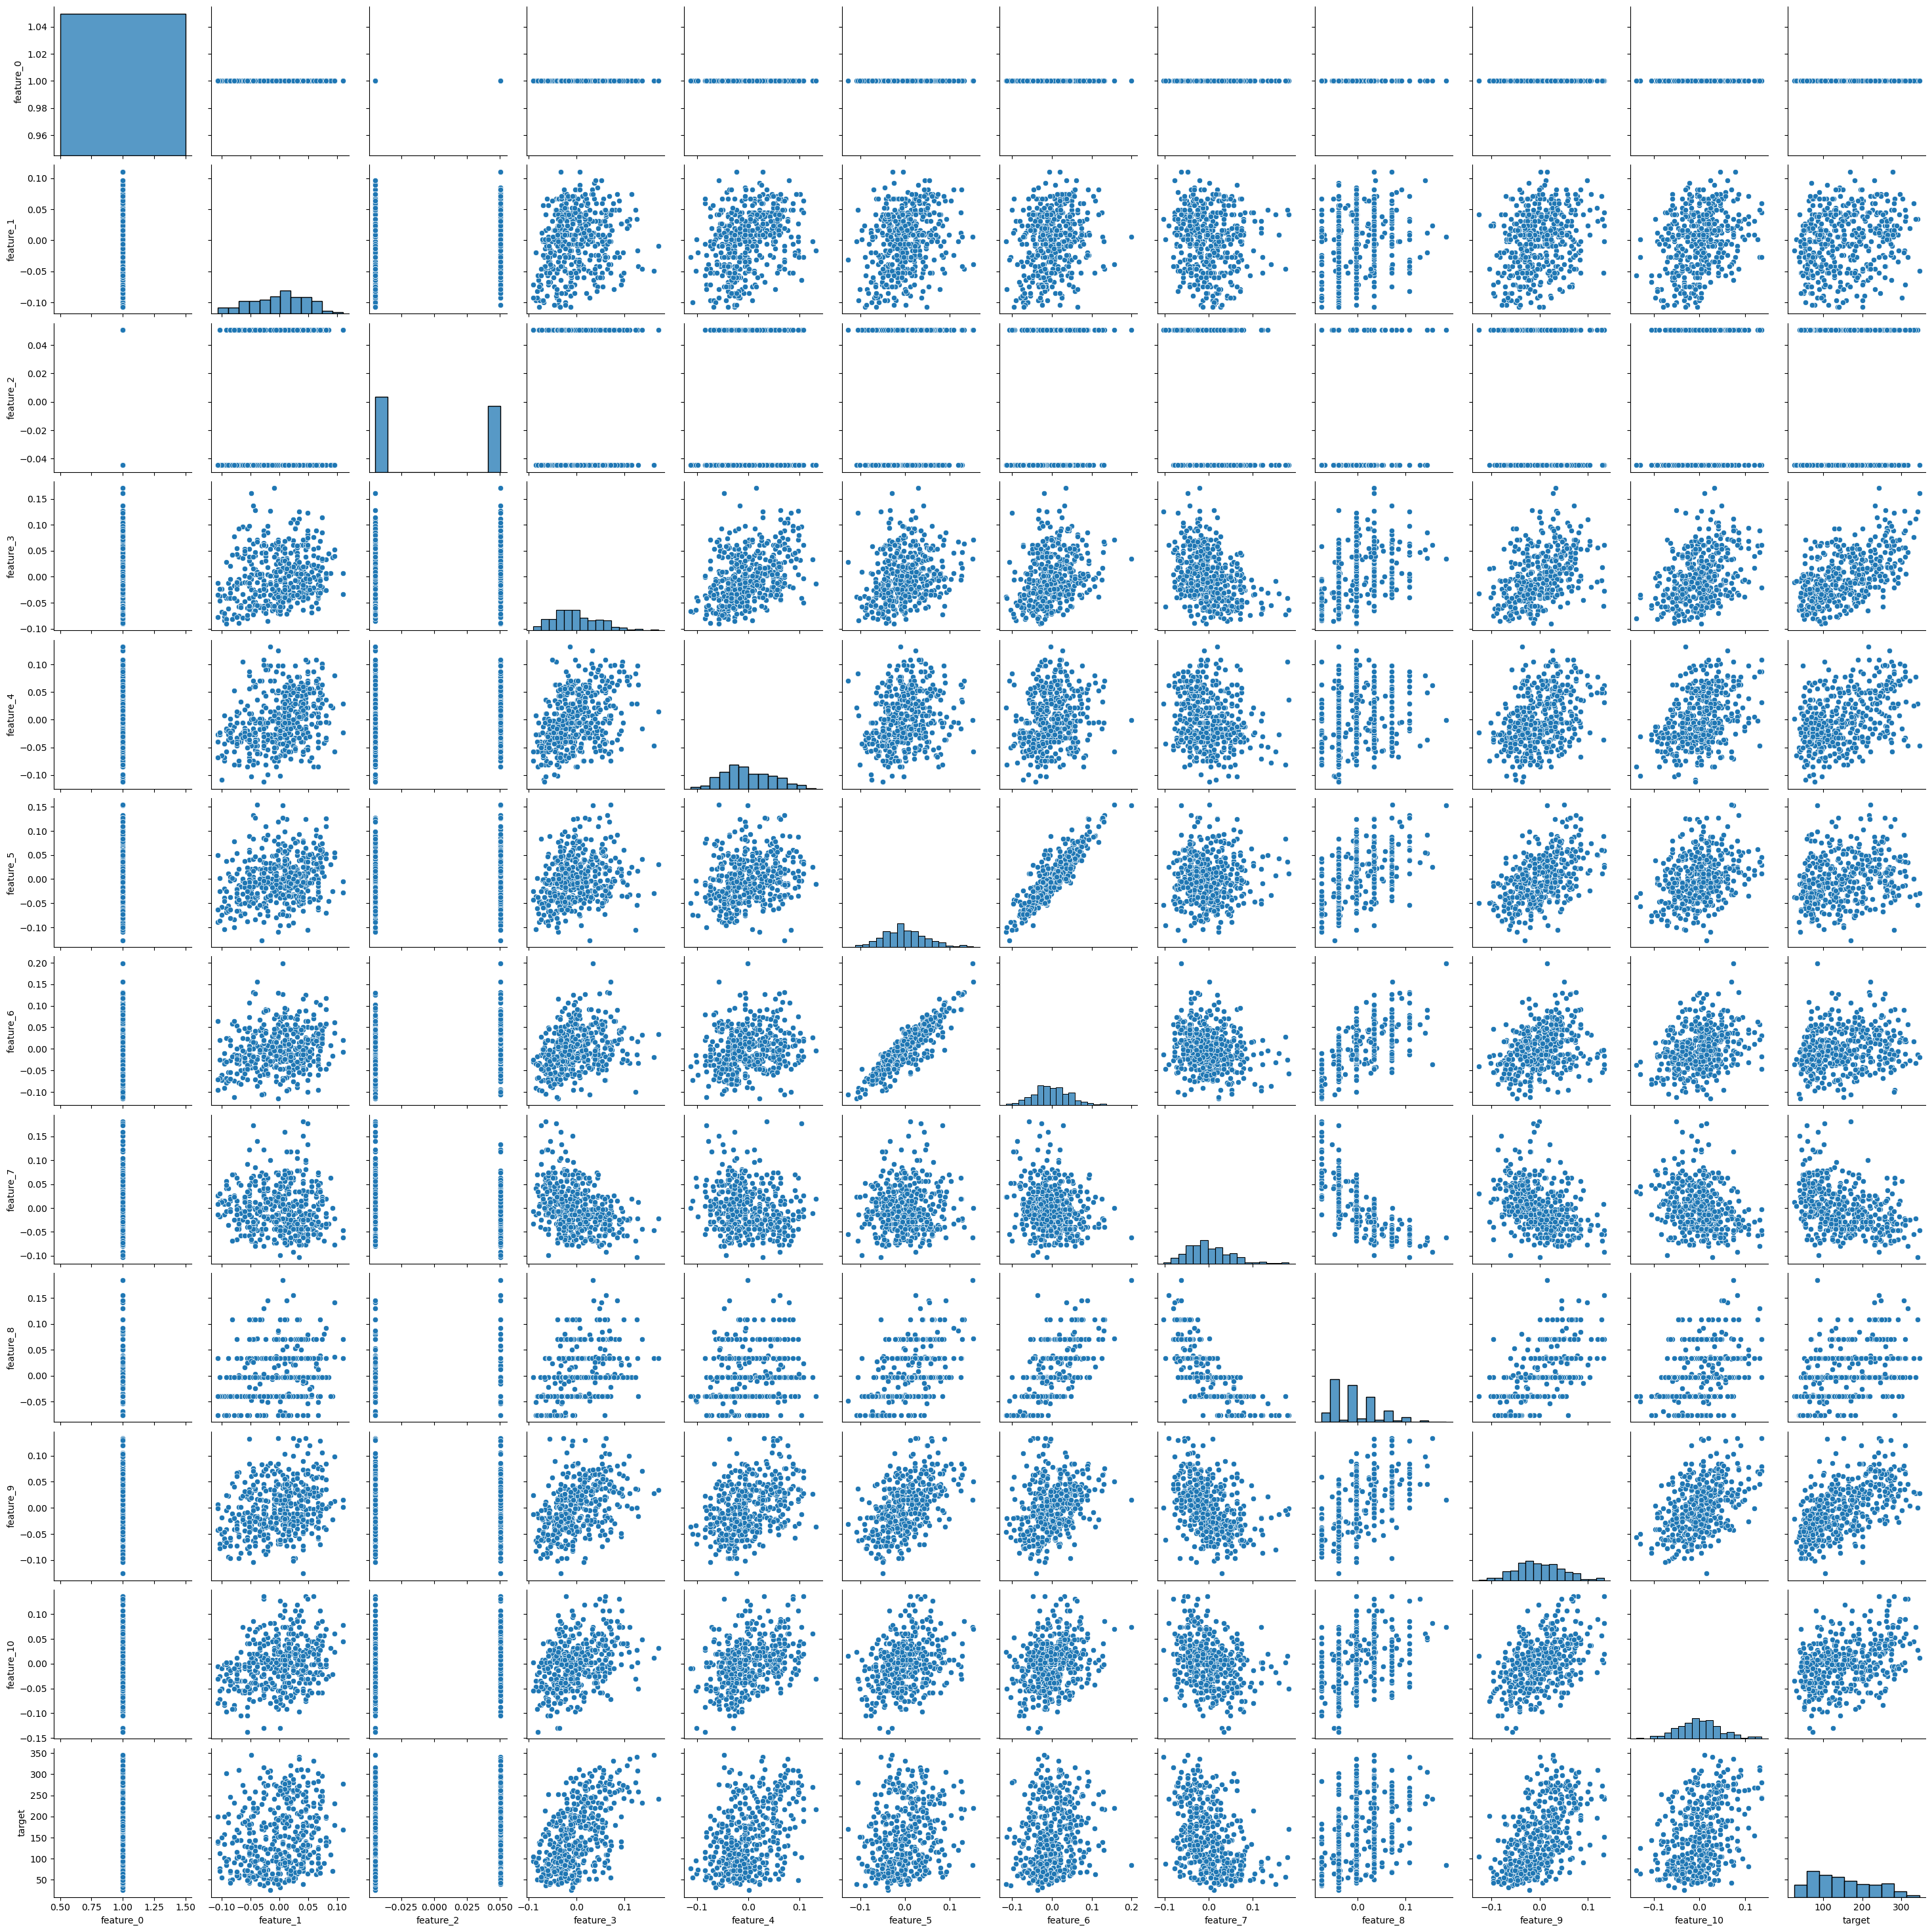

In [46]:
import  pandas as pd
df = pd.DataFrame(X, columns=["feature_" + str(i) for i in range(X.shape[1])])
df["target"] = y
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [47]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,1.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,1.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,1.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,1.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,1.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...
437,1.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,1.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,1.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,1.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [48]:
df = df.drop(columns=['feature_0'])

In [49]:
df = df.drop(columns=['feature_1'])
df

,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...
437,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


<Axes: >

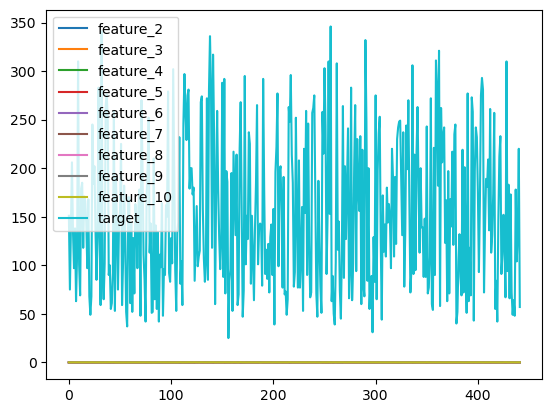

In [50]:
df.plot()

In [51]:
X=df.iloc[:,:-1]
X

,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...
437,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [52]:
y=df['target']
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

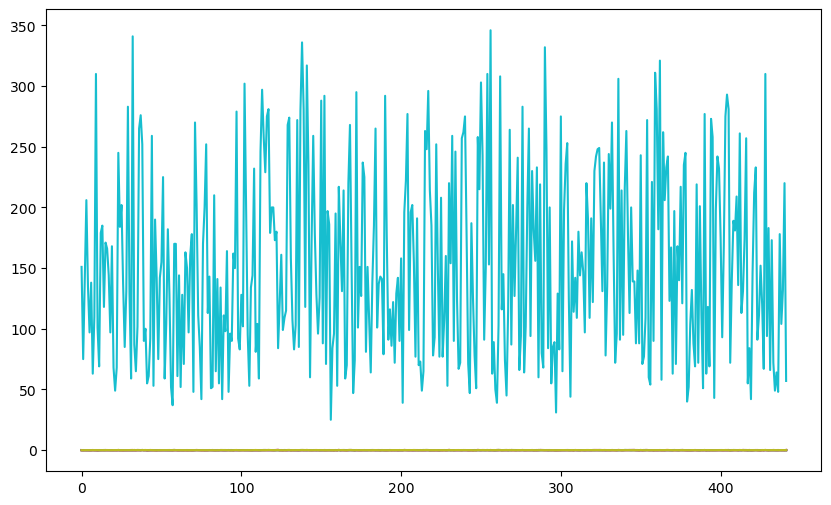

In [53]:
#normalize
df_normalized = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)


In [54]:
df

,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...
437,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [55]:
X.shape,y.shape

((442, 9), (442,))

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [57]:
def ridge_regression_gradient_descent(X, y, alpha=0.01, lamda=1, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []

    for i in range(iterations):
        error = X.dot(theta) - y
        gradient = (1/m) * X.T.dot(error) + (lamda/m) * theta
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta, alpha, lamda)
        cost_history.append(cost)

        if i % 50== 0:
            print(f"Iteration {i}: Cost = {cost}")
            print(theta)

    return theta, cost_history

# Perform Ridge Regression with Gradient Descent
alpha = 0.01
lamda = 1
iterations = 500
theta, cost_history = ridge_regression_gradient_descent(X, y, alpha, lamda, iterations)



Iteration 0: Cost = 14537.049969617585
feature_2     0.001577
feature_3     0.021480
feature_4     0.016171
feature_5     0.007766
feature_6     0.006375
feature_7    -0.014460
feature_8     0.015767
feature_9     0.020727
feature_10    0.014010
dtype: float64
Iteration 50: Cost = 14527.549887429364
feature_2     0.079667
feature_3     1.093209
feature_4     0.822839
feature_5     0.394519
feature_6     0.323626
feature_7    -0.735607
feature_8     0.801710
feature_9     1.054614
feature_10    0.712542
dtype: float64
Iteration 100: Cost = 14518.145101193206
feature_2     0.156248
feature_3     2.160456
feature_4     1.625874
feature_5     0.778256
feature_6     0.637929
feature_7    -1.453103
feature_8     1.582994
feature_9     2.083679
feature_10    1.407275
dtype: float64
Iteration 150: Cost = 14508.834607753282
feature_2     0.231330
feature_3     3.223242
feature_4     2.425294
feature_5     1.158998
feature_6     0.949303
feature_7    -2.166968
feature_8     2.359643
feature_9   

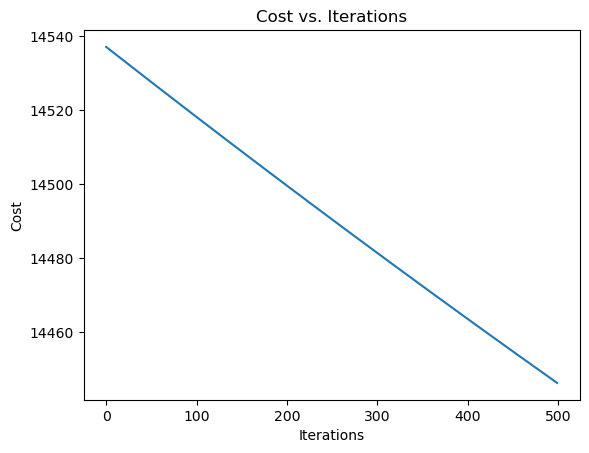

In [58]:
# Plot the cost over iterations
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [59]:
theta

feature_2      0.714518
feature_3     10.519023
feature_4      7.906039
feature_5      3.734690
feature_6      3.042712
feature_7     -7.050192
feature_8      7.653789
feature_9     10.125778
feature_10     6.817469
dtype: float64

In [60]:
def pred():

    for i in theta:
        print(i)
        
        


In [61]:
pred()

0.7145177298675919
10.519023442525109
7.906038717409429
3.7346896432342294
3.0427122295513667
-7.050192475467706
7.653788689864334
10.125778422160192
6.8174693507446005


In [62]:
type(theta)

pandas.core.series.Series

In [63]:
theta

feature_2      0.714518
feature_3     10.519023
feature_4      7.906039
feature_5      3.734690
feature_6      3.042712
feature_7     -7.050192
feature_8      7.653789
feature_9     10.125778
feature_10     6.817469
dtype: float64